# Cross-Sectional Mean Reversion

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [2]:
DOWdf = pd.read_csv('data/DOW_daily_history.csv', header=0)
DOWdf['Date'] = pd.to_datetime(DOWdf['Date'], errors='coerce')
DOWdf.set_index('Date', inplace=True)

## Linear Long-Short Strategy

In [3]:
DOWdf = DOWdf.dropna()
returns = DOWdf.pct_change()
average_returns = returns.mean(axis=1)
weights = -(returns.subtract(average_returns, axis=0))
weights = weights.divide(weights.abs().sum(axis=1), axis=0)

portfolio_returns = (weights.shift(1) * returns).sum(axis=1)

## Linear Long-Short Strategy Cumulative Returns + Statistics

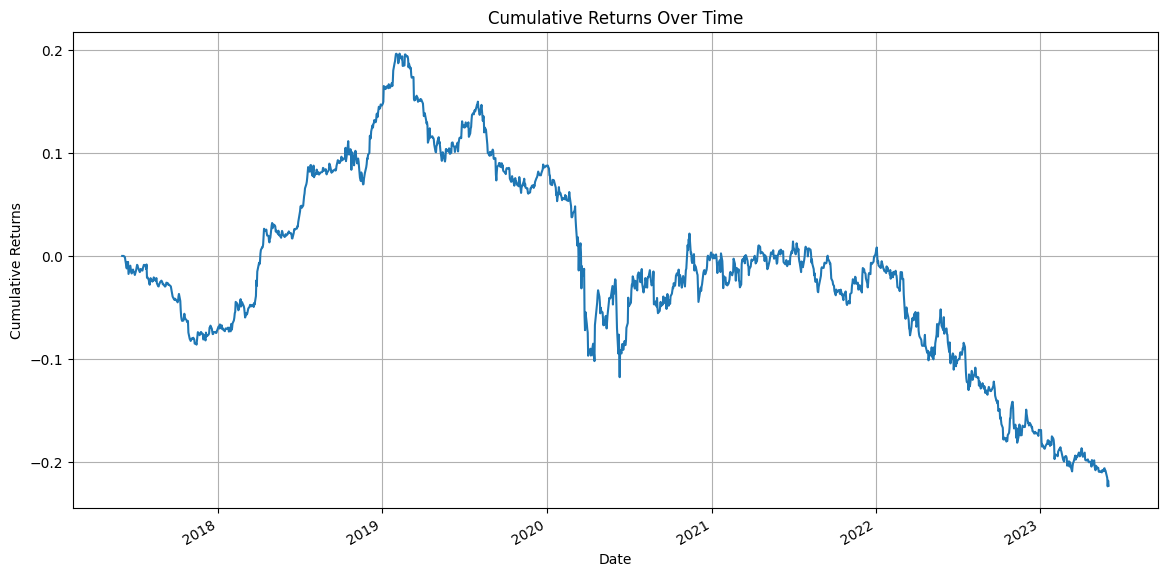

Sharpe Ratio: -0.059420665299444946
Annualized Percentage Return (APR): -4.12%


In [4]:
cumulative_returns = (1 + portfolio_returns).cumprod() - 1

plt.figure(figsize=(14, 7))
cumulative_returns.plot()
plt.title('Cumulative Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid(True)
plt.show()

risk_free_rate = 0.053  # 3 month t bill rate
daily_rf = (1 + risk_free_rate) ** (1/252) - 1  
excess_daily_return = portfolio_returns - daily_rf
sharpe_ratio = excess_daily_return.mean() / excess_daily_return.std()

trading_days = 252
annualized_return = (cumulative_returns.iloc[-1] + 1) ** (trading_days / len(cumulative_returns)) - 1

print(f"Sharpe Ratio: {sharpe_ratio}")
print(f"Annualized Percentage Return (APR): {annualized_return * 100:.2f}%")